In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from ipywidgets import interact, FloatSlider
from sklearn.preprocessing import MinMaxScaler
from ipywidgets import interact, Dropdown
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('nba2.csv')


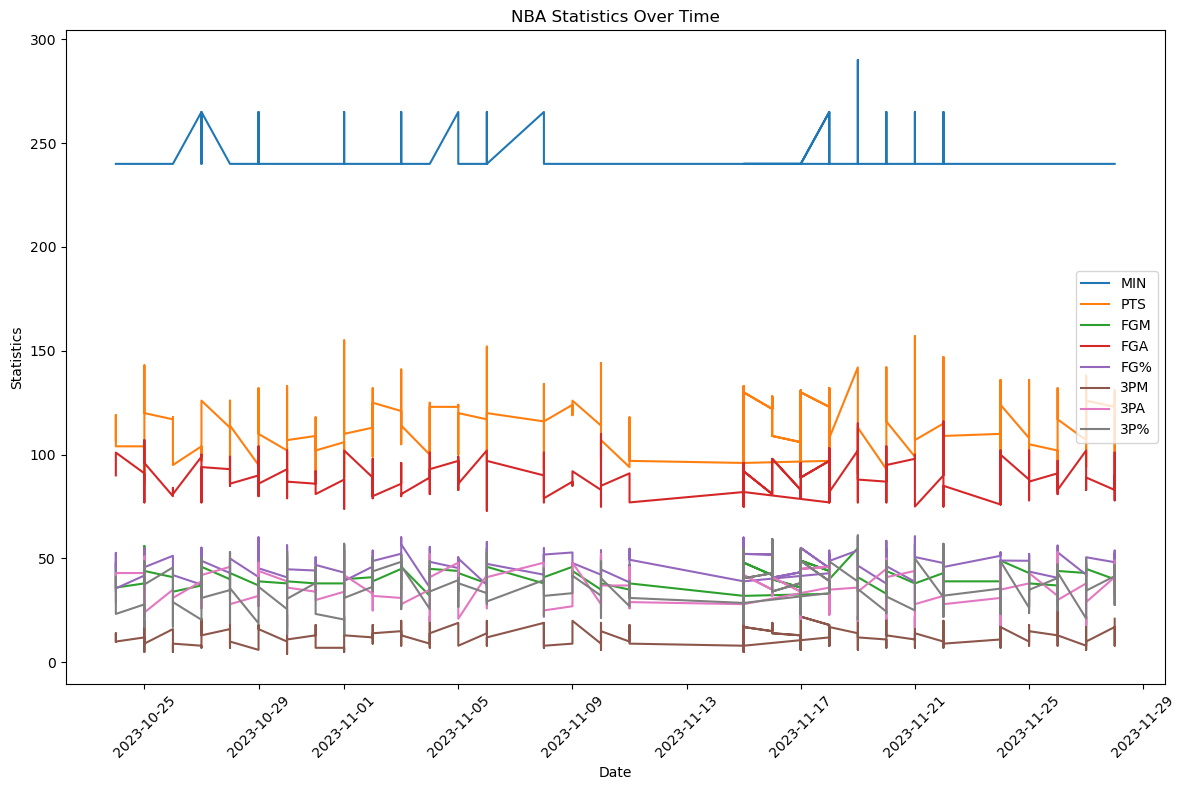

In [3]:
df['GAME DATE'] = pd.to_datetime(df['GAME DATE'])

# Plotting
plt.figure(figsize=(12, 8))

# Plot each statistic on a separate line
plt.plot(df['GAME DATE'], df['MIN'], label='MIN')
plt.plot(df['GAME DATE'], df['PTS'], label='PTS')
plt.plot(df['GAME DATE'], df['FGM'], label='FGM')
plt.plot(df['GAME DATE'], df['FGA'], label='FGA')
plt.plot(df['GAME DATE'], df['FG%'], label='FG%')
plt.plot(df['GAME DATE'], df['3PM'], label='3PM')
plt.plot(df['GAME DATE'], df['3PA'], label='3PA')
plt.plot(df['GAME DATE'], df['3P%'], label='3P%')

# Customize the plot
plt.title('NBA Statistics Over Time')
plt.xlabel('Date')
plt.ylabel('Statistics')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
df = df.dropna()

X = df[['PTS', 'FGM', 'FGA', '3PM', '3PA']]
y = df['W/L']
y = y.apply(lambda x: 1 if x == 'W' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer()
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

model = LogisticRegression()
model.fit(X_train_imputed, y_train)

y_pred = model.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_result)

new_PTS = float(input("Enter PTS for the next game: "))
new_FGM = float(input("Enter FGM for the next game: "))
new_FGA = float(input("Enter FGA for the next game: "))
new_3PM = float(input("Enter 3PM for the next game: "))
new_3PA = float(input("Enter 3PA for the next game: "))

new_data = pd.DataFrame({ 'PTS': [new_PTS], 'FGM': [new_FGM], 'FGA': [new_FGA], '3PM': [new_3PM], '3PA': [new_3PA]})
new_data_imputed = pd.DataFrame(imputer.transform(new_data), columns=new_data.columns)
new_data_predictions = model.predict(new_data_imputed)

predicted_result = 'W' if new_data_predictions[0] == 1 else 'L'
print(f'Predicted Result: {predicted_result}')

Accuracy: 0.7669902912621359
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77        56
           1       0.71      0.83      0.76        47

    accuracy                           0.77       103
   macro avg       0.77      0.77      0.77       103
weighted avg       0.78      0.77      0.77       103



Enter PTS for the next game:  116
Enter FGM for the next game:  32
Enter FGA for the next game:  67
Enter 3PM for the next game:  14
Enter 3PA for the next game:  36


Predicted Result: W
